In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from pandas_datareader import data
from datetime import datetime as dt
import numpy as np
import backtrader as bt




start_date1 = dt(2000,1,1)

end_date1 = dt(2019,12,31)


start_date2 = dt(2020,1,1)

end_date2 = dt(2022,9,21)


yf.pdr_override()

targets = ['RIO.AX','FMG.AX','BHP.AX']



for i in range(0,len(targets)):    

    stock = data.get_data_yahoo([targets[i]], start_date1, end_date2)

    path = f'InputData/{targets[i]}.csv'

    record = stock.to_csv(path)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


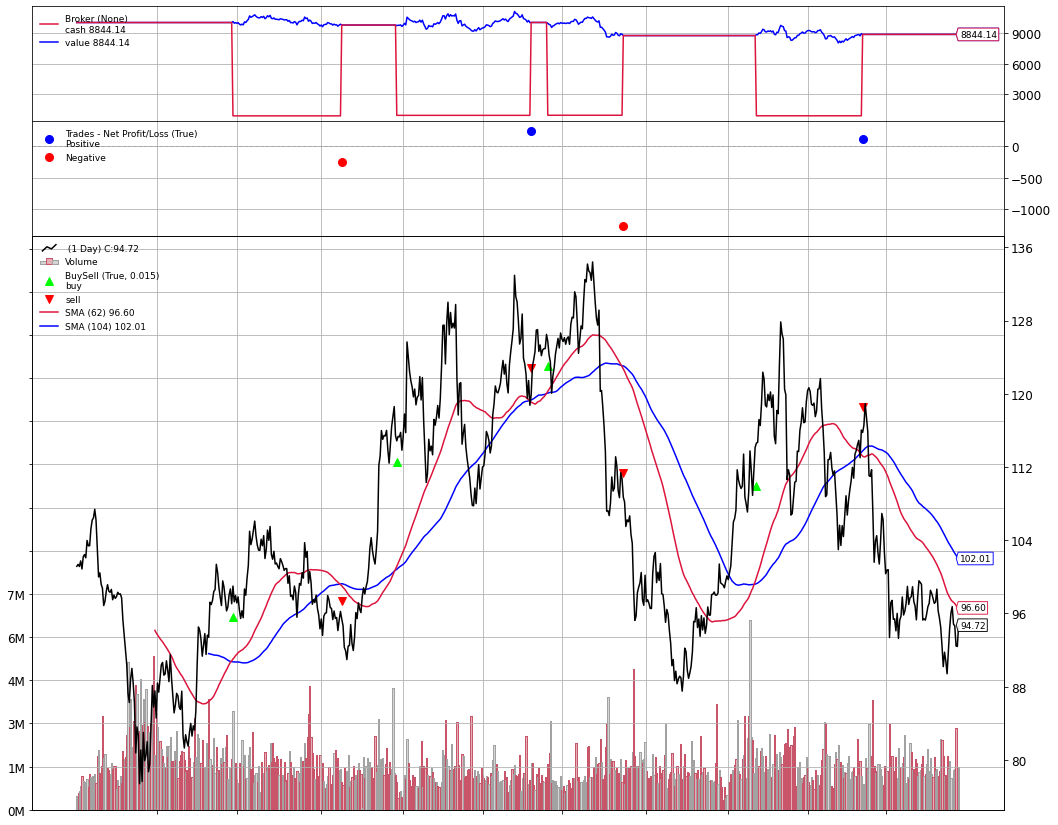

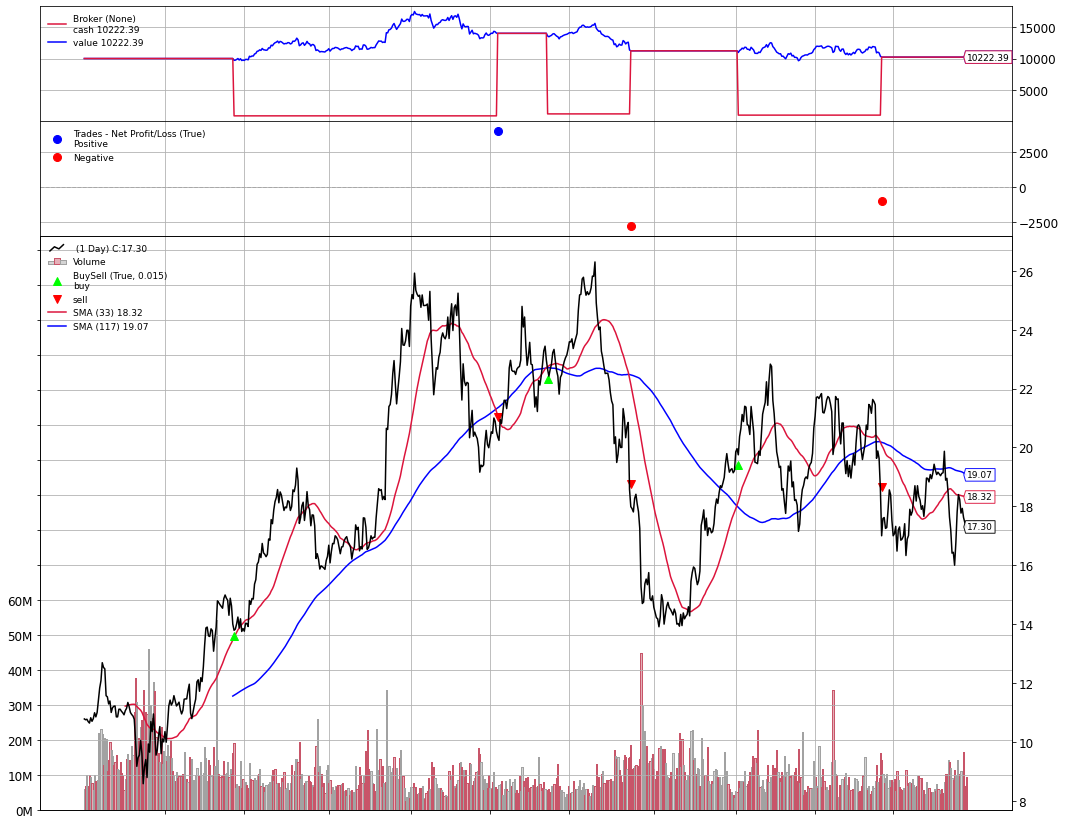

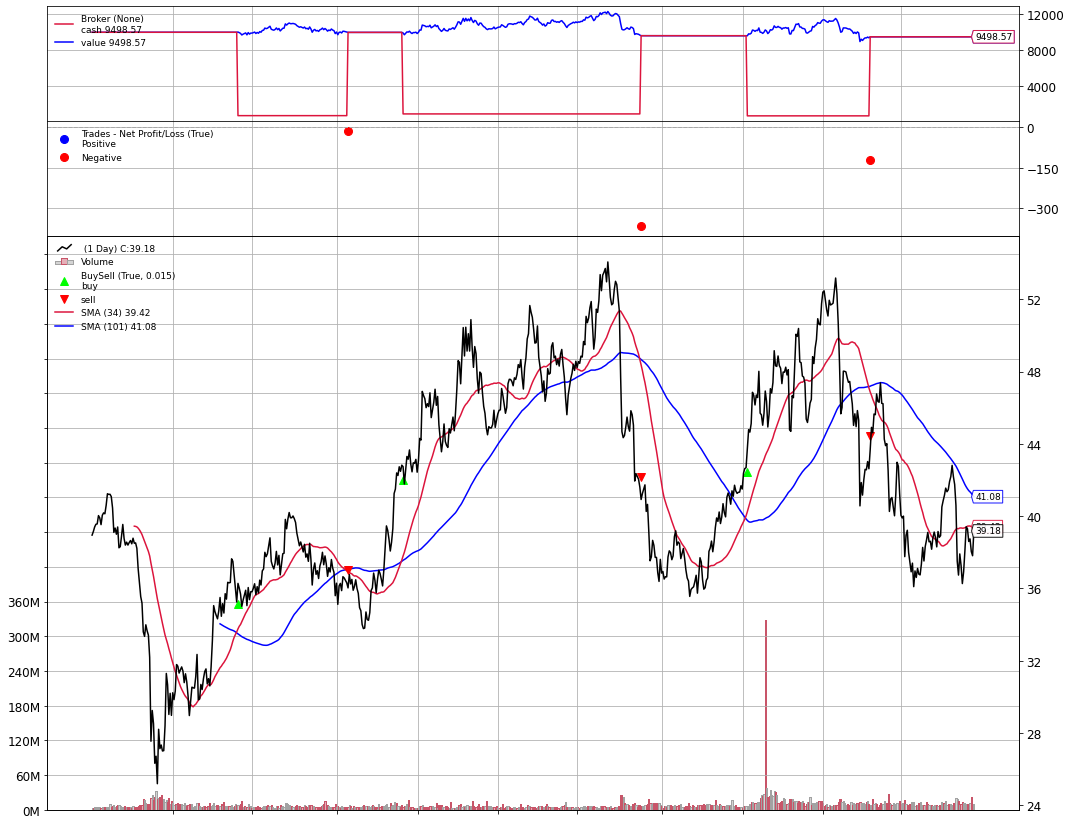

In [6]:
rangeShort=np.arange(5,81,1)
rangeLong=np.arange(100,120,1)
log=[]


for u in range(0,len(targets)):  
    testBestPeriod=[]  
    for i in rangeShort:
        for j in rangeLong:

            class SMAStrategy(bt.Strategy):
                def __init__(self):
                    self.dataclose = self.data0.close
                    self.order = None
                    self.buyprice = None
                    self.buycomm = None
                
                    self.smaS = bt.indicators.SMA(self.data0,period=i)
                    self.smaL = bt.indicators.SMA(self.data0,period=j)
                    
                    

                def next(self):
                    if not self.position:
                        if self.smaS[0]>self.smaL[0] :
                            self.buy()
                    else:
                        if self.smaS[0]<self.smaL[0] :    
                                self.close()

            cerebro=bt.Cerebro()
            df=pd.read_csv(f'InputData/{targets[u]}.csv',header=0, index_col='Date', parse_dates=['Date'])
            testStock=bt.feeds.PandasData(dataname=df,fromdate=start_date1, todate=end_date1,timeframe=bt.TimeFrame.Days)
            cerebro.adddata(testStock)
            cerebro.addstrategy(SMAStrategy)
            cerebro.broker.setcash(10000)
            cerebro.broker.setcommission(commission=0.005)

            cerebro.addsizer(bt.sizers.PercentSizer, percents=90)
            result = cerebro.run()

            portvalue = cerebro.broker.getvalue()

            match={'shortPeriod':i,'longPeriod':j,'finalValue':portvalue}

            testBestPeriod.append(match)

    max_value = max(testBestPeriod,key=lambda x:x['finalValue'])

    log.append({'Stock':targets[u],'Result':max_value})

    bestShort=max_value['shortPeriod']

    bestLong=max_value['longPeriod']

    class SMAStrategy(bt.Strategy):
        def __init__(self):
            self.dataclose = self.data0.close
            self.order = None
            self.buyprice = None
            self.buycomm = None
        
            self.smaS = bt.indicators.SMA(self.data0,period=bestShort)
            self.smaL = bt.indicators.SMA(self.data0,period=bestLong)
            
            

        def next(self):
            if not self.position:
                if self.smaS[0]>self.smaL[0] :
                    self.buy()
            else:
                if self.smaS[0]<self.smaL[0] :    
                        self.close()
    
    cerebro=bt.Cerebro()
    df=pd.read_csv(f'InputData/{targets[u]}.csv',header=0, index_col='Date', parse_dates=['Date'])
    testStock=bt.feeds.PandasData(dataname=df,fromdate=start_date2, todate=end_date2,timeframe=bt.TimeFrame.Days)
    cerebro.adddata(testStock)
    cerebro.addstrategy(SMAStrategy)
    cerebro.broker.setcash(10000)
    cerebro.broker.setcommission(commission=0.005)

    cerebro.addsizer(bt.sizers.PercentSizer, percents=90)
    cerebro.run()

    portvalue = cerebro.broker.getvalue()

    plt.rcParams['figure.figsize'] = [15, 12]
    plt.rcParams.update({'font.size': 12}) 
    img=cerebro.plot(iplot=False)
    img[0][0].savefig(f'OutputData/{targets[u]}.png')





In [7]:
print(log)

[{'Stock': 'RIO.AX', 'Result': {'shortPeriod': 62, 'longPeriod': 104, 'finalValue': 54185.03442232389}}, {'Stock': 'FMG.AX', 'Result': {'shortPeriod': 33, 'longPeriod': 117, 'finalValue': 20456618.320030212}}, {'Stock': 'BHP.AX', 'Result': {'shortPeriod': 34, 'longPeriod': 101, 'finalValue': 41486.46085654802}}]
